In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [11]:
datos = pd.read_csv(filepath_or_buffer = "C:/Users/rober/Downloads/comprar_alquilar.csv", sep = ',', low_memory=False)
datos.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [12]:
datos.var(axis=0)

ingresos          2.832026e+06
gastos_comunes    7.404187e+04
pago_coche        1.561019e+04
gastos_otros      2.825864e+04
ahorros           3.015513e+08
vivienda          1.859719e+10
estado_civil      7.008768e-01
hijos             1.870967e+00
trabajo           6.430250e+00
comprar           2.227723e-01
dtype: float64

In [13]:
datos = datos.drop(['comprar'], axis=1)
datos

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,6000,1000,0,600,50000,400000,0,2,2
1,6745,944,123,429,43240,636897,1,3,6
2,6455,1033,98,795,57463,321779,2,1,8
3,7098,1278,15,254,54506,660933,0,0,3
4,6167,863,223,520,41512,348932,0,0,3
...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2
198,3961,1030,270,475,21880,280421,2,3,8
199,3184,955,276,684,35565,388025,1,3,8
200,3334,867,369,652,19985,376892,1,2,5


In [15]:
scaler=StandardScaler()
scaler.fit(datos)
X_scaled=scaler.transform(datos)

In [16]:
pca_pipe=make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)
model_pca=pca_pipe.named_steps['pca']

In [17]:
pd.DataFrame(
data=model_pca.components_,
    columns=datos.columns,
    index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
PC1,-0.493720,-0.318229,0.123771,0.111876,-0.444650,-0.462609,0.252279,0.259859,0.290248
PC2,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
PC3,0.091419,0.363453,0.516144,-0.701986,-0.191767,-0.140513,0.172885,-0.112184,0.036910
PC4,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
PC5,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009
PC6,-0.075477,0.067903,-0.153697,0.154422,-0.230181,0.290799,0.767070,-0.387964,-0.256446
PC7,0.154319,-0.105598,0.027333,0.101876,0.524584,-0.641034,0.212365,-0.460067,0.105053
PC8,0.012732,-0.010274,0.061759,-0.037977,0.212759,-0.260847,0.204816,0.532216,-0.745630
PC9,0.776990,-0.374440,-0.048557,0.026631,-0.474168,-0.156101,-0.003289,0.011051,-0.060657


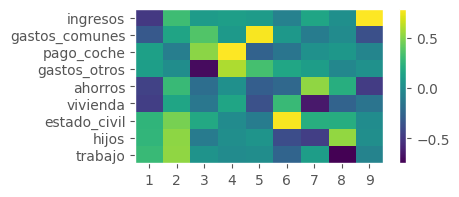

In [18]:
fig, ax =plt.subplots(nrows=1,ncols=1,figsize=(4,2))
componentes=model_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(model_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada de cada componente
----------------------------------------------------
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]


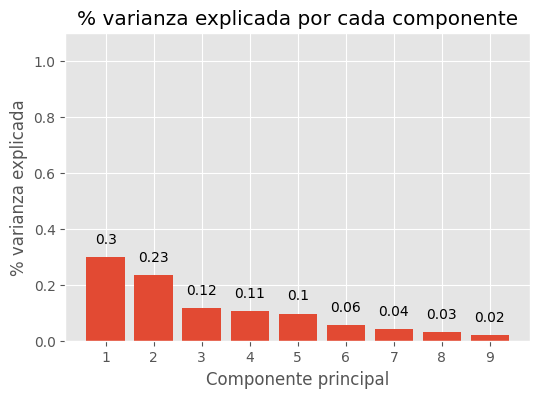

In [19]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada de cada componente',)
print('----------------------------------------------------')
print(model_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(model_pca.n_components_) + 1,
    height = model_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, model_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('% varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('% varianza explicada');

In [20]:
pca=PCA(n_components=6)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

In [22]:
X_pca=pd.DataFrame(
X_pca,
    columns=['PC1','PC2','PC3','PC4','PC5','PC6'],
    index=datos.index
)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.321915,-0.222950,-1.599863,-0.885014,0.646617,-0.700208
1,-1.147878,1.716967,-0.395722,-0.447960,-0.687805,-0.231969
2,-0.090369,1.836066,-1.359382,0.337505,0.742387,0.593030
3,-3.455898,-0.078279,0.202382,-1.573584,-0.068551,-0.051945
4,-0.916933,-1.184676,-0.190036,0.117804,-0.147753,-0.619750


In [23]:
print('Porcentanje de varianza por componente', X_pca.shape)
exp=pca.explained_variance_ratio_
print(exp)
print('Suma:' ,sum(exp[0:6]))

Porcentanje de varianza por componente (202, 6)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866]
Suma: 0.9087048736637351


Porcentaje de varianza explicada acumulada
[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487]


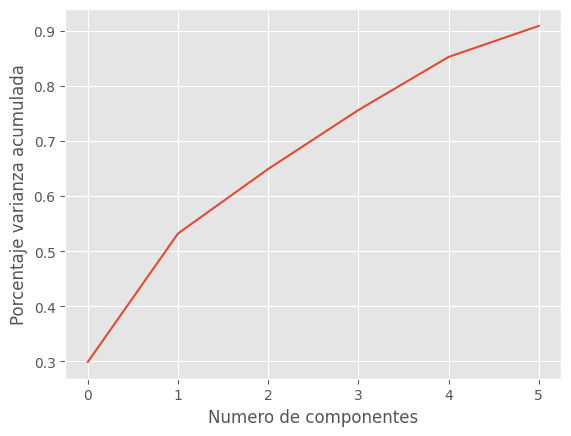

In [24]:
prop_varianza_acum=pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

plt.plot(np.cumsum(pca.explained_variance_ratio_,))
plt.xlabel('Numero de componentes')
plt.ylabel('Porcentaje varianza acumulada')
plt.show()

In [25]:
y=datos.index
y=pd.DataFrame(y,columns=['comprar'])
y

,comprar
0,0
1,1
2,2
3,3
4,4
...,...
197,197
198,198
199,199
200,200


In [26]:
X=X_pca[['PC1','PC2','PC3','PC4','PC5','PC6']]
X=X.reset_index()

In [27]:
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.321915,-0.222950,-1.599863,-0.885014,0.646617,-0.700208
1,-1.147878,1.716967,-0.395722,-0.447960,-0.687805,-0.231969
2,-0.090369,1.836066,-1.359382,0.337505,0.742387,0.593030
3,-3.455898,-0.078279,0.202382,-1.573584,-0.068551,-0.051945
4,-0.916933,-1.184676,-0.190036,0.117804,-0.147753,-0.619750
...,...,...,...,...,...,...
197,0.707036,-2.506168,0.430903,0.583919,-0.620195,-0.205709
198,2.038917,1.378909,0.824921,0.039240,0.373044,0.013360
199,1.481464,0.975900,-0.637578,0.884946,0.128337,-0.655749
200,1.514633,-0.392176,-0.005710,1.308566,-0.114526,-0.056951


In [29]:
datosoptimizados=pd.DataFrame(X_pca)
datosoptimizados.to_csv('comprar_alquilar_optimizado')